In [2]:
!pip install --upgrade ydata-profiling

In [28]:
import numpy as np
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

from ydata_profiling import ProfileReport

In [29]:
listing_df1 = pd.read_csv('./Data/listings.csv')
listing_df=listing_df1.dropna(subset=['price','room_type','number_of_reviews_ltm','availability_365'])
print(len(listing_df),len(listing_df1))
listing_df.columns

13068 13274


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [30]:
room_types=listing_df['room_type'].unique()
group_by_room_type=listing_df.groupby('room_type')

         room_type  mean_reviews_per_month  mean_number_of_leases_next_year
0  Entire home/apt                1.258161                        15.097937
1     Private room                0.754831                         9.057971
2       Hotel room                0.543742                         6.524909
3      Shared room                0.669643                         8.035714


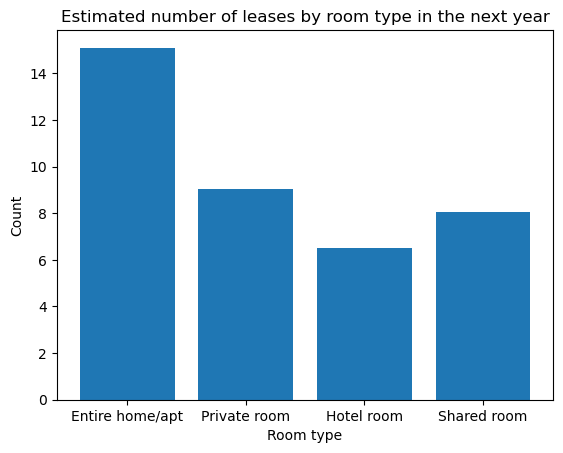

In [31]:
# Análisis de cantidad de arrendamientos en los próximos 365 días por tipo de habitación
mean_number_of_leases_next_year=group_by_room_type['number_of_reviews_ltm'].mean().values
mean_reviews_per_month_by_room_type=mean_number_of_leases_next_year/12
room_type_leases_report=pd.DataFrame({'room_type':room_types,'mean_reviews_per_month':mean_reviews_per_month_by_room_type,
                                      'mean_number_of_leases_next_year':mean_number_of_leases_next_year})

print(room_type_leases_report)

plt.bar(height=room_type_leases_report['mean_number_of_leases_next_year'],x=room_type_leases_report['room_type'])
plt.title('Estimated number of leases by room type in the next year')
plt.xlabel('Room type')
plt.ylabel('Count')

#plt.savefig('./Diagrams/Estimated number of leases by room type in the next year.png')

plt.show()


         room_type  count  mean_price
0  Entire home/apt  12120  111.452228
1     Private room    823  363.913043
2       Hotel room     69   91.902795
3      Shared room     56   25.571429


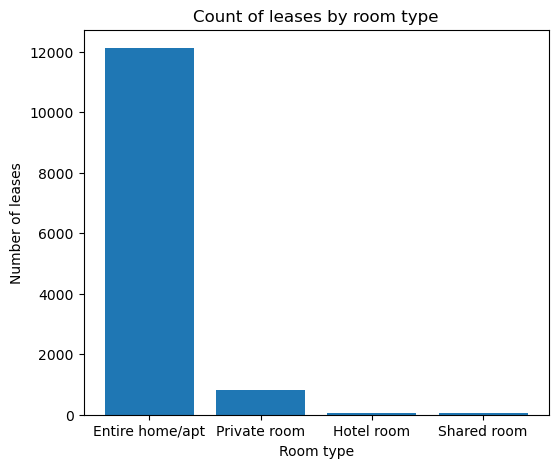

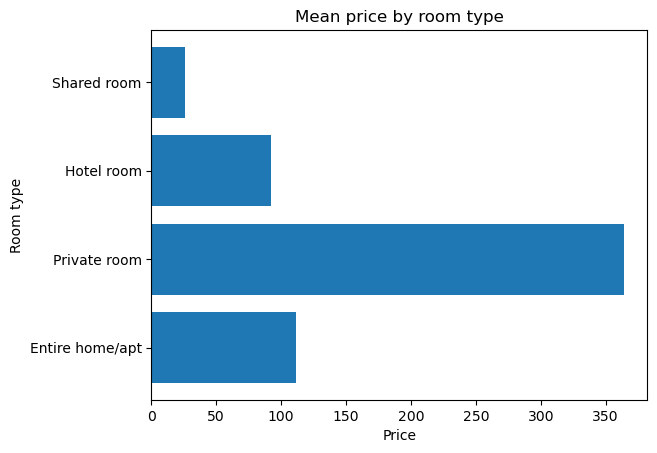

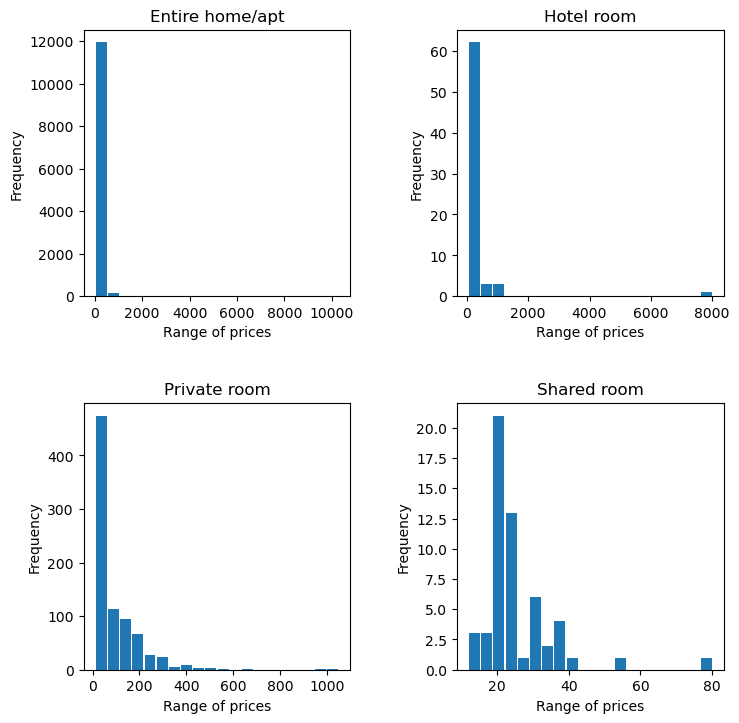

In [32]:
# Análisis por tipo de habitación
mean_price_by_room_type=group_by_room_type['price'].mean().values
count_by_room_type=listing_df['room_type'].value_counts().values
room_type_price_report=pd.DataFrame({'room_type':room_types,'count':count_by_room_type,'mean_price':mean_price_by_room_type})

print(room_type_price_report)

plt.figure(figsize=(6,5))
plt.bar(height=room_type_price_report['count'],x=room_type_price_report['room_type'])
plt.title('Count of leases by room type')
plt.ylabel('Number of leases')
plt.xlabel('Room type')
#plt.savefig('./Diagrams/Count of leases by room type.png')
plt.show()

## Distribución de precios por tipo de habitación
prices_by_room_type=group_by_room_type['price']

plt.figure()
plt.barh(width=room_type_price_report['mean_price'],y=room_type_price_report['room_type'])
plt.title('Mean price by room type')
plt.xlabel('Price')
plt.ylabel('Room type')
#plt.savefig('./Diagrams/Mean price by room type.png')
plt.show()

plt.figure(figsize=(8,8))
i=1
for room,dist in prices_by_room_type:
    plt.subplot(2,2,i)
    plt.hist(dist,bins=20,rwidth=0.9,align='mid')
    plt.title(room)
    plt.xlabel('Range of prices')
    plt.ylabel('Frequency')
    i+=1
    

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
#plt.savefig('./Diagrams/Range of prices by room type.png')
plt.show()

100%|███████████████████████████████████████████████████████████████████████████| 12277/12277 [00:13<00:00, 884.12it/s]


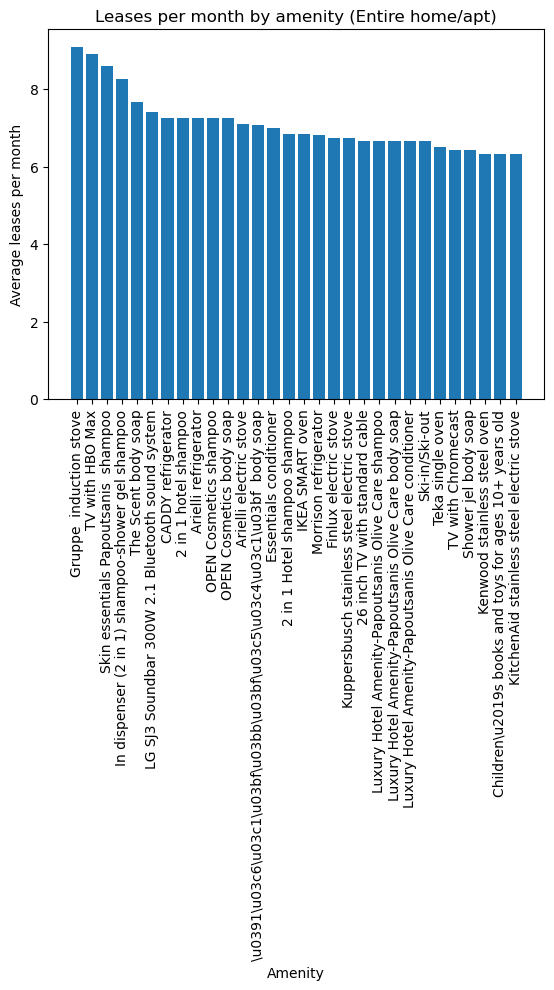

['Gruppe  induction stove' 'TV with HBO Max'
 'Skin essentials Papoutsanis  shampoo'
 'In dispenser (2 in 1) shampoo-shower gel shampoo' 'The Scent body soap'
 'LG SJ3 Soundbar 300W 2.1 Bluetooth sound system' 'CADDY refrigerator'
 '2 in 1 hotel shampoo' 'Arielli refrigerator' 'OPEN Cosmetics shampoo'
 'OPEN Cosmetics body soap' 'Arielli electric stove'
 '\\u0391\\u03c6\\u03c1\\u03bf\\u03bb\\u03bf\\u03c5\\u03c4\\u03c1\\u03bf  body soap'
 'Essentials conditioner' '2 in 1 Hotel shampoo shampoo' 'IKEA SMART oven'
 'Morrison refrigerator' 'Finlux electric stove'
 'Kuppersbusch stainless steel electric stove'
 '26 inch TV with standard cable'
 'Luxury Hotel Amenity-Papoutsanis Olive Care shampoo'
 'Luxury Hotel Amenity-Papoutsanis Olive Care body soap'
 'Luxury Hotel Amenity-Papoutsanis Olive Care conditioner'
 'Ski-in/Ski-out' 'Teka single oven' 'TV with Chromecast'
 'Shower jel body soap' 'Kenwood stainless steel oven'
 'Children\\u2019s books and toys for ages 10+ years old'
 'KitchenAid

100%|██████████████████████████████████████████████████████████████████████████████| 869/869 [00:00<00:00, 1003.68it/s]


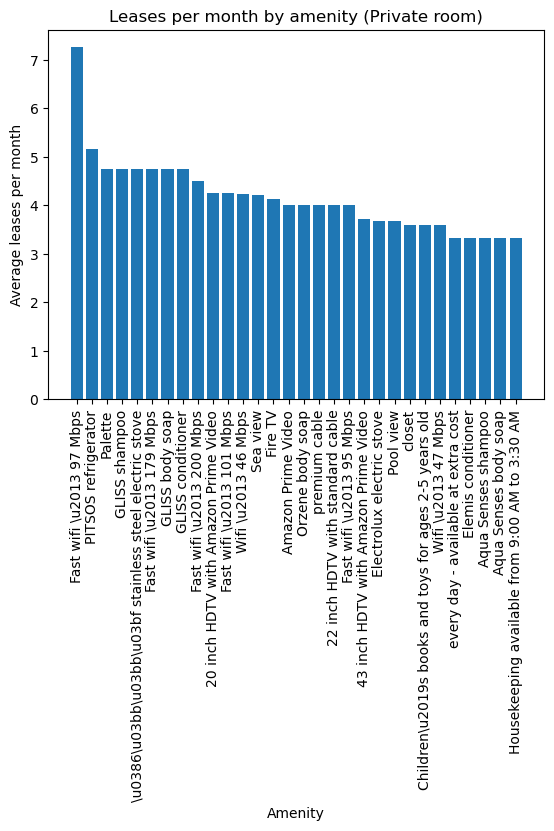

['Fast wifi \\u2013 97 Mbps' 'PITSOS refrigerator' 'Palette'
 'GLISS shampoo'
 '\\u0386\\u03bb\\u03bb\\u03bf stainless steel electric stove'
 'Fast wifi \\u2013 179 Mbps' 'GLISS body soap' 'GLISS conditioner'
 'Fast wifi \\u2013 200 Mbps' '20 inch HDTV with Amazon Prime Video'
 'Fast wifi \\u2013 101 Mbps' 'Wifi \\u2013 46 Mbps' 'Sea view' 'Fire TV'
 'Amazon Prime Video' 'Orzene body soap' 'premium cable'
 '22 inch HDTV with standard cable' 'Fast wifi \\u2013 95 Mbps'
 '43 inch HDTV with Amazon Prime Video' 'Electrolux electric stove'
 'Pool view' 'closet'
 'Children\\u2019s books and toys for ages 2-5 years old'
 'Wifi \\u2013 47 Mbps' 'every day - available at extra cost'
 'Elemis conditioner' 'Aqua Senses shampoo' 'Aqua Senses body soap'
 'Housekeeping available from 9:00 AM to 3:30 AM']


100%|████████████████████████████████████████████████████████████████████████████████| 72/72 [00:00<00:00, 1252.02it/s]


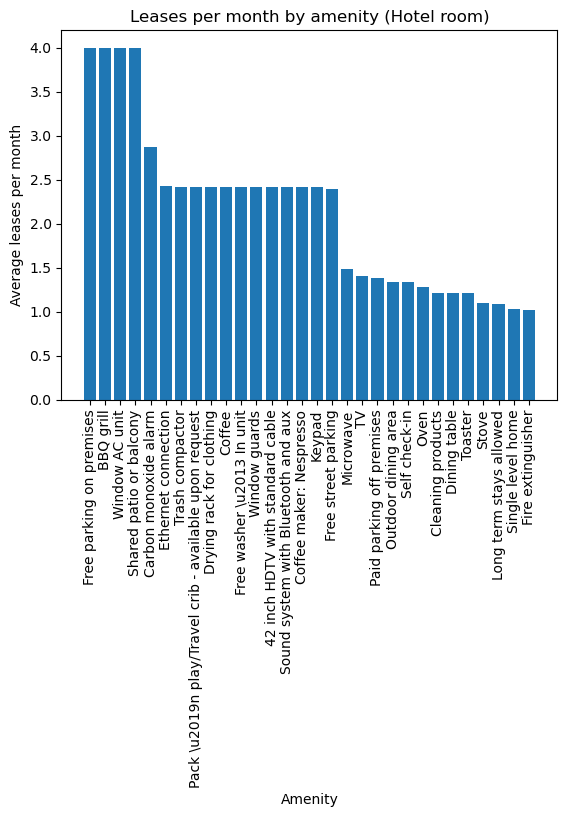

['Free parking on premises' 'BBQ grill' 'Window AC unit'
 'Shared patio or balcony' 'Carbon monoxide alarm' 'Ethernet connection'
 'Trash compactor'
 'Pack \\u2019n play/Travel crib - available upon request'
 'Drying rack for clothing' 'Coffee' 'Free washer \\u2013 In unit'
 'Window guards' '42 inch HDTV with standard cable'
 'Sound system with Bluetooth and aux' 'Coffee maker: Nespresso' 'Keypad'
 'Free street parking' 'Microwave' 'TV' 'Paid parking off premises'
 'Outdoor dining area' 'Self check-in' 'Oven' 'Cleaning products'
 'Dining table' 'Toaster' 'Stove' 'Long term stays allowed'
 'Single level home' 'Fire extinguisher']


100%|████████████████████████████████████████████████████████████████████████████████| 56/56 [00:00<00:00, 2776.73it/s]


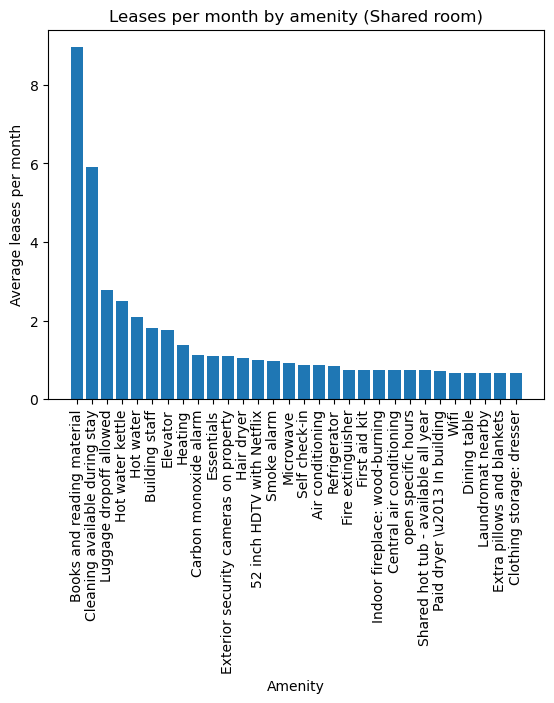

['Books and reading material' 'Cleaning available during stay'
 'Luggage dropoff allowed' 'Hot water kettle' 'Hot water' 'Building staff'
 'Elevator' 'Heating' 'Carbon monoxide alarm' 'Essentials'
 'Exterior security cameras on property' 'Hair dryer'
 '52 inch HDTV with Netflix' 'Smoke alarm' 'Microwave' 'Self check-in'
 'Air conditioning' 'Refrigerator' 'Fire extinguisher' 'First aid kit'
 'Indoor fireplace: wood-burning' 'Central air conditioning'
 'open specific hours' 'Shared hot tub - available all year'
 'Paid dryer \\u2013 In building' 'Wifi' 'Dining table'
 'Laundromat nearby' 'Extra pillows and blankets'
 'Clothing storage: dresser']


In [33]:
# Comodidades con más reservas por mes
listing_df2 = pd.read_csv('./Data/listings/listings.csv')
listing_dfc=listing_df2.dropna(subset=['amenities','number_of_reviews_ltm'])

for room_type in room_types:
    listing_by_room_type=listing_dfc[listing_dfc['room_type']==room_type]
    amenities_info={}
    for i in tqdm(range(len(listing_by_room_type))):
        amenities=listing_by_room_type['amenities'].iloc[i].replace('[','').replace(']','').replace('"','').split(', ')
        for amenity in amenities:
            if amenity not in amenities_info:
                amenities_info[amenity]={'sum':listing_by_room_type['number_of_reviews_ltm'].iloc[i]/12,'count':1}
            else:
                amenities_info[amenity]['sum']+=listing_by_room_type['number_of_reviews_ltm'].iloc[i]/12
                amenities_info[amenity]['count']+=1

    amenities_score={}
    for amenity in amenities_info:
        amenities_score[amenity]=amenities_info[amenity]['sum']/amenities_info[amenity]['count']

    amenities_df=pd.DataFrame({'amenity':amenities_score.keys(),'score':amenities_score.values()})
    top_amenities=amenities_df.sort_values(by='score',ascending=False).head(30)
    
    plt.figure()
    plt.bar(height=top_amenities['score'],x=top_amenities['amenity'])
    plt.title('Leases per month by amenity ({})'.format(room_type))
    plt.xlabel('Amenity')
    plt.ylabel('Average leases per month')
    plt.xticks(rotation=90)
    #if '/' in room_type:
    #    plt.savefig("./Diagrams/Leases per month by amenity (Entire house-apt).png")
    #else:
    #    plt.savefig("./Diagrams/Leases per month by amenity ({}).png".format(room_type))
    plt.show()
    
    print(np.array(top_amenities['amenity']))


100%|██████████████████████████████████████████████████████████████████████████| 12120/12120 [00:02<00:00, 5162.27it/s]


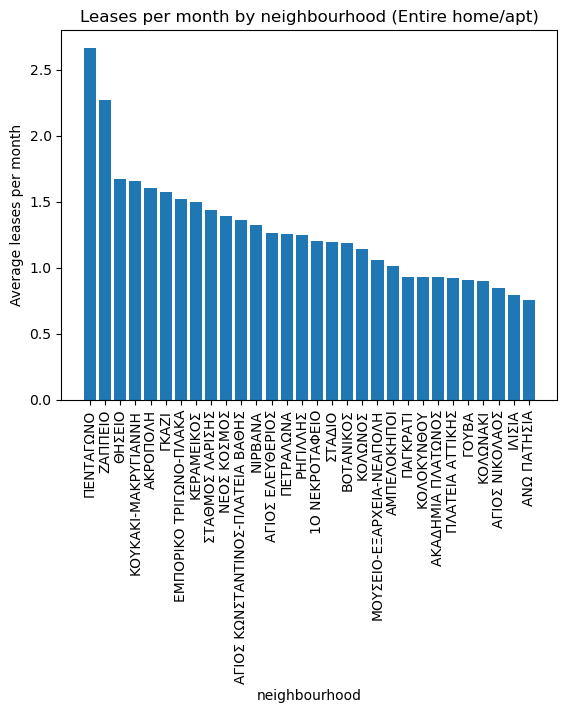

['ΠΕΝΤΑΓΩΝΟ' 'ΖΑΠΠΕΙΟ' 'ΘΗΣΕΙΟ' 'ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ' 'ΑΚΡΟΠΟΛΗ' 'ΓΚΑΖΙ'
 'ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ' 'ΚΕΡΑΜΕΙΚΟΣ' 'ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ' 'ΝΕΟΣ ΚΟΣΜΟΣ'
 'ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ' 'ΝΙΡΒΑΝΑ' 'ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ'
 'ΠΕΤΡΑΛΩΝΑ' 'ΡΗΓΙΛΛΗΣ' '1Ο ΝΕΚΡΟΤΑΦΕΙΟ' 'ΣΤΑΔΙΟ' 'ΒΟΤΑΝΙΚΟΣ' 'ΚΟΛΩΝΟΣ'
 'ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ' 'ΑΜΠΕΛΟΚΗΠΟΙ' 'ΠΑΓΚΡΑΤΙ' 'ΚΟΛΟΚΥΝΘΟΥ'
 'ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ' 'ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ' 'ΓΟΥΒΑ' 'ΚΟΛΩΝΑΚΙ' 'ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ'
 'ΙΛΙΣΙΑ' 'ΑΝΩ ΠΑΤΗΣΙΑ']


100%|██████████████████████████████████████████████████████████████████████████████| 823/823 [00:00<00:00, 3883.73it/s]


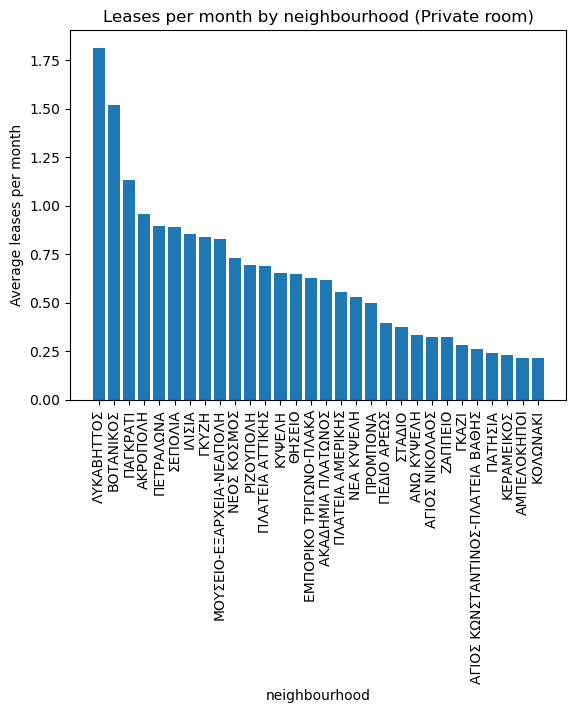

['ΛΥΚΑΒΗΤΤΟΣ' 'ΒΟΤΑΝΙΚΟΣ' 'ΠΑΓΚΡΑΤΙ' 'ΑΚΡΟΠΟΛΗ' 'ΠΕΤΡΑΛΩΝΑ' 'ΣΕΠΟΛΙΑ'
 'ΙΛΙΣΙΑ' 'ΓΚΥΖΗ' 'ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ' 'ΝΕΟΣ ΚΟΣΜΟΣ' 'ΡΙΖΟΥΠΟΛΗ'
 'ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ' 'ΚΥΨΕΛΗ' 'ΘΗΣΕΙΟ' 'ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ'
 'ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ' 'ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ' 'ΝΕΑ ΚΥΨΕΛΗ' 'ΠΡΟΜΠΟΝΑ'
 'ΠΕΔΙΟ ΑΡΕΩΣ' 'ΣΤΑΔΙΟ' 'ΑΝΩ ΚΥΨΕΛΗ' 'ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ' 'ΖΑΠΠΕΙΟ' 'ΓΚΑΖΙ'
 'ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ' 'ΠΑΤΗΣΙΑ' 'ΚΕΡΑΜΕΙΚΟΣ' 'ΑΜΠΕΛΟΚΗΠΟΙ'
 'ΚΟΛΩΝΑΚΙ']


100%|████████████████████████████████████████████████████████████████████████████████| 69/69 [00:00<00:00, 4281.29it/s]


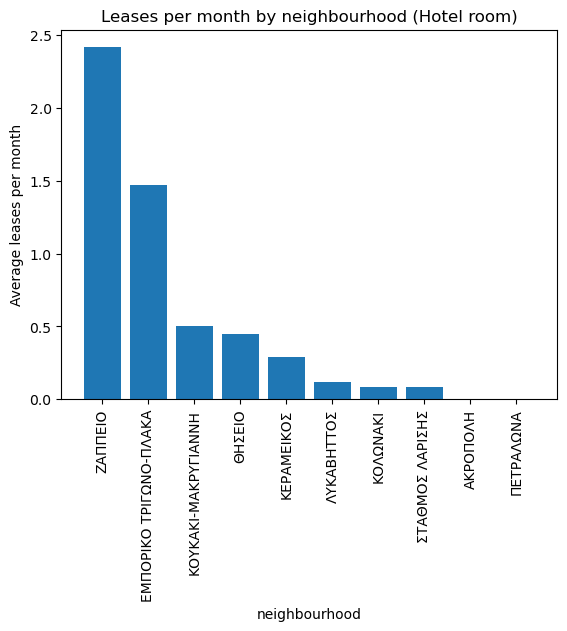

['ΖΑΠΠΕΙΟ' 'ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ' 'ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ' 'ΘΗΣΕΙΟ'
 'ΚΕΡΑΜΕΙΚΟΣ' 'ΛΥΚΑΒΗΤΤΟΣ' 'ΚΟΛΩΝΑΚΙ' 'ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ' 'ΑΚΡΟΠΟΛΗ'
 'ΠΕΤΡΑΛΩΝΑ']


100%|████████████████████████████████████████████████████████████████████████████████| 56/56 [00:00<00:00, 5273.13it/s]


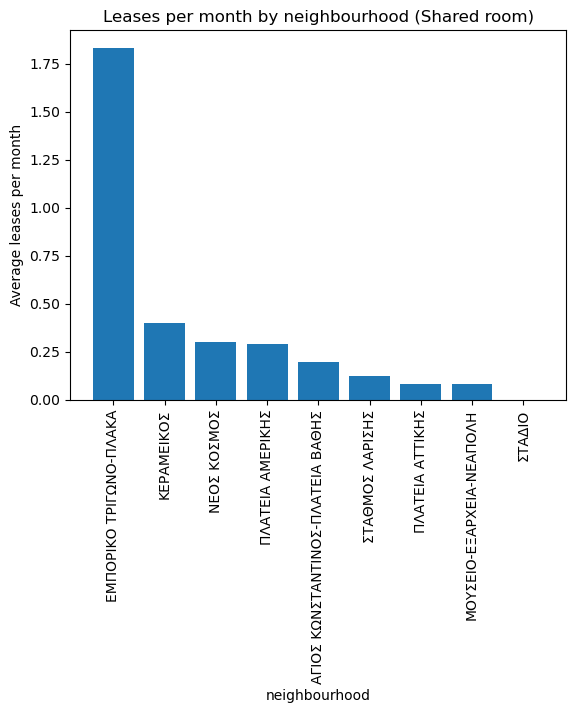

['ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ' 'ΚΕΡΑΜΕΙΚΟΣ' 'ΝΕΟΣ ΚΟΣΜΟΣ' 'ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ'
 'ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ' 'ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ' 'ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ'
 'ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ' 'ΣΤΑΔΙΟ']


In [34]:
# Vecindarios con más reservas por mes

for room_type in room_types:
    listing_by_room_type=listing_df[listing_df['room_type']==room_type]
    neighbourhoods_info={}
    for i in tqdm(range(len(listing_by_room_type))):
        neighbourhood=listing_by_room_type.iloc[i]['neighbourhood']
        if neighbourhood not in neighbourhoods_info:
            neighbourhoods_info[neighbourhood]={'sum':listing_by_room_type['number_of_reviews_ltm'].iloc[i]/12,'count':1}
        else:
            neighbourhoods_info[neighbourhood]['sum']+=listing_by_room_type['number_of_reviews_ltm'].iloc[i]/12
            neighbourhoods_info[neighbourhood]['count']+=1

    neighbourhoods_score={}
    for neighbourhood in neighbourhoods_info:
        neighbourhoods_score[neighbourhood]=neighbourhoods_info[neighbourhood]['sum']/neighbourhoods_info[neighbourhood]['count']

    neighbourhoods_df=pd.DataFrame({'neighbourhood':neighbourhoods_score.keys(),'score':neighbourhoods_score.values()})
    top_neighbourhoods=neighbourhoods_df.sort_values(by='score',ascending=False).head(30)
    
    plt.figure()
    plt.bar(height=top_neighbourhoods['score'],x=top_neighbourhoods['neighbourhood'])
    plt.title('Leases per month by neighbourhood ({})'.format(room_type))
    plt.xlabel('neighbourhood')
    plt.ylabel('Average leases per month')
    plt.xticks(rotation=90)
    #if '/' in room_type:
    #    plt.savefig("./Diagrams/Leases per month by neighbourhood (Entire house-apt).png")
    #else:
    #    plt.savefig("./Diagrams/Leases per month by neighbourhood ({}).png".format(room_type))
    plt.show()
    
    print(np.array(top_neighbourhoods['neighbourhood']))

Text(0.5, 1.0, 'Heatmap')

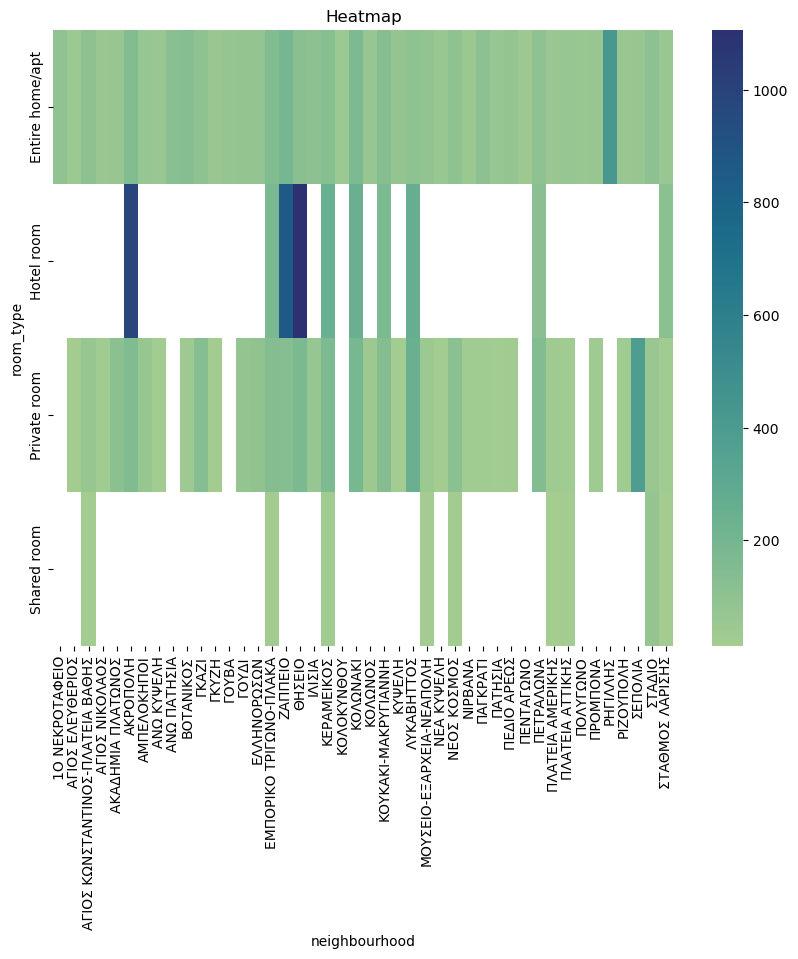

In [35]:
# Distribución de precios por vecindario y tipo de acomodación
neighbourhood_room_type_group_by=listing_df.groupby(['room_type','neighbourhood'])['price'].mean().unstack()
plt.figure(figsize=(10,8))
sns.heatmap(neighbourhood_room_type_group_by,xticklabels=True,cmap="crest")
plt.title('Heatmap')
#plt.savefig('./Diagrams/Heatmap by neighbourhood and room type.png')
#neighbourhood_room_type_group_by